# MGP Crudos

Lo primero que se muestra es el MGP en crudo, calculado a partir de 3 columnas distintas:

- Tiempo total.
- Tiempo de respuesta medio.
- Puntaje.

Para los pacientes "Chucho", "Luis" y "Mecha".

/tmp/ipykernel_32258/4022070073.py:13: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  return -np.fromstring(x, sep=",").mean()
/tmp/ipykernel_32258/4022070073.py:13: RuntimeWarning: Mean of empty slice.
  return -np.fromstring(x, sep=",").mean()


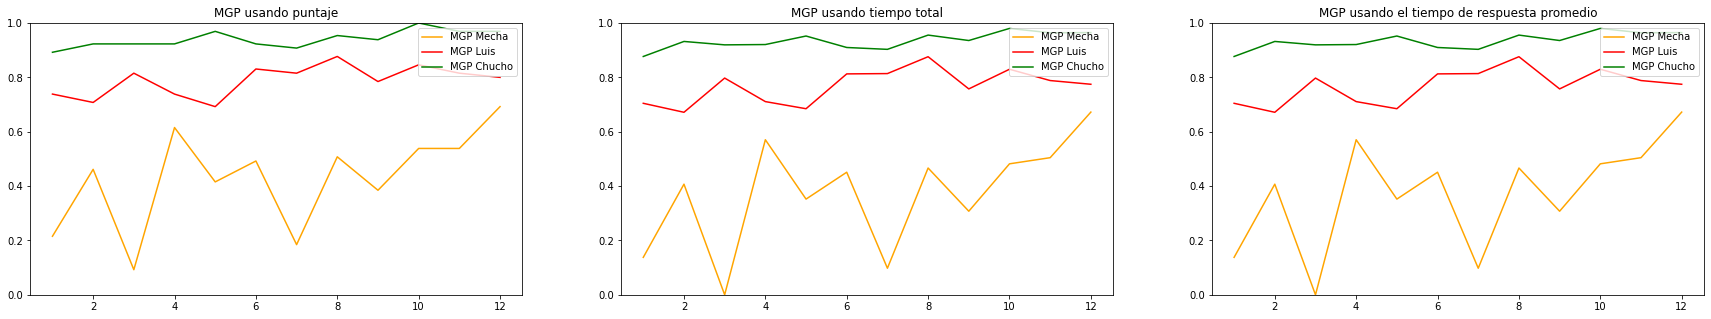

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%run ../load-results.ipynb import GetAllResultsFromDifficulties, GetAllResultsFrom, GetDifficulty
%run ./irmgp.ipynb import RemoveNaNValues, CalculateSessionMGPValuesOverTime

# Funciones de ajuste de datos
def totalTime(x):
    return -x

def timeBetweenSuccesses(x): 
    return -np.fromstring(x, sep=",").mean()

# Columnas que se usan para el test
timeColumn = "Tiempo total"
responseTimeColumn = "Tiempo entre aciertos"
scoreColumn = "Puntaje"

# Obtenemos los datos a usar
df_mecha_raw = RemoveNaNValues(GetAllResultsFrom(gameSessionIds=[84]))
df_luis_raw = RemoveNaNValues(GetAllResultsFrom(gameSessionIds=[64]))
df_chucho_raw = RemoveNaNValues(GetAllResultsFrom(gameSessionIds=[29]))

# Obtenemos la dificultad de las partidas
difficulty = GetDifficulty(df)
difficultyDf = GetAllResultsFromDifficulties([difficulty])

# Procesamos las columnas de puntaje
df_mecha_score = df_mecha_raw[scoreColumn]
df_luis_score = df_luis_raw[scoreColumn]
df_chucho_score = df_chucho_raw[scoreColumn]

# Procesamos las columnas de tiempo total
df_mecha_time = df_mecha_raw[timeColumn].apply(totalTime)
df_luis_time = df_luis_raw[timeColumn].apply(totalTime)
df_chucho_time = df_chucho_raw[timeColumn].apply(totalTime)

# Procesamos las columnas de tiempo de respuesta
df_mecha_responseTime = df_mecha_raw[responseTimeColumn].apply(timeBetweenSuccesses)
df_luis_responseTime = df_luis_raw[responseTimeColumn].apply(timeBetweenSuccesses)
df_chucho_responseTime = df_chucho_raw[responseTimeColumn].apply(timeBetweenSuccesses)

# Obtenemos los valores máximos y mínimos para el puntaje
minScore, maxScore = difficultyDf[scoreColumn].min(), difficultyDf[scoreColumn].max()

# Obtenemos los valores máximos y mínimos para el tiempo total
minTotalTime, maxTotalTime = difficultyDf[timeColumn].apply(totalTime).min(), difficultyDf[timeColumn].apply(totalTime).max()

# Obtenemos los valores máximos y mínimos para el tiempo de respuesta
minResponseTime, maxResponseTime = difficultyDf[responseTimeColumn].apply(timeBetweenSuccesses).min(), difficultyDf[responseTimeColumn].apply(timeBetweenSuccesses).max()

# Calculamos los valores del MGP de cada sesión para el puntaje
y_mecha_score = CalculateSessionMGPValuesOverTime(df_mecha_score, minScore, maxScore)
y_luis_score = CalculateSessionMGPValuesOverTime(df_luis_score, minScore, maxScore)[0:len(y_mecha)]
y_chucho_score = CalculateSessionMGPValuesOverTime(df_chucho_score, minScore, maxScore)[0:len(y_mecha)]

# Calculamos los valores del MGP de cada sesión para el tiempo total
y_mecha_totalTime = CalculateSessionMGPValuesOverTime(df_mecha_time, minTotalTime, maxTotalTime)
y_luis_totalTime = CalculateSessionMGPValuesOverTime(df_luis_time, minTotalTime, maxTotalTime)[0:len(y_mecha)]
y_chucho_totalTime = CalculateSessionMGPValuesOverTime(df_chucho_time, minTotalTime, maxTotalTime)[0:len(y_mecha)]

# Calculamos los valores del MGP de cada sesión para el tiempo de respuesta
y_mecha_responseTime = CalculateSessionMGPValuesOverTime(df_mecha_responseTime, minResponseTime, maxResponseTime)
y_luis_responseTime = CalculateSessionMGPValuesOverTime(df_luis_responseTime, minResponseTime, maxResponseTime)[0:len(y_mecha)]
y_chucho_responseTime = CalculateSessionMGPValuesOverTime(df_chucho_responseTime, minResponseTime, maxResponseTime)[0:len(y_mecha)]

# Graficamos los datos
x = np.linspace(1, len(y_mecha), len(y_mecha))
plt.figure(figsize=(30, 5))

scoreGraph = plt.subplot(1, 3, 1)
timeGraph = plt.subplot(1, 3, 2, sharey=scoreGraph)
responseTimeGraph = plt.subplot(1, 3, 3, sharey=scoreGraph)

scoreGraph.plot(x, y_mecha_score, label='MGP Mecha', color="orange")
scoreGraph.plot(x, y_luis_score, label='MGP Luis', color="red")
scoreGraph.plot(x, y_chucho_score, label='MGP Chucho', color="Green")

timeGraph.plot(x, y_mecha_totalTime, label='MGP Mecha', color="orange")
timeGraph.plot(x, y_luis_totalTime, label='MGP Luis', color="red")
timeGraph.plot(x, y_chucho_totalTime, label='MGP Chucho', color="Green")

responseTimeGraph.plot(x, y_mecha_responseTime, label='MGP Mecha', color="orange")
responseTimeGraph.plot(x, y_luis_responseTime, label='MGP Luis', color="red")
responseTimeGraph.plot(x, y_chucho_responseTime, label='MGP Chucho', color="Green")

scoreGraph.legend(loc="upper right")
scoreGraph.set_title("MGP usando puntaje")
timeGraph.legend(loc="upper right")
timeGraph.set_title("MGP usando tiempo total")
responseTimeGraph.legend(loc="upper right")
responseTimeGraph.set_title("MGP usando el tiempo de respuesta promedio")

plt.ylim(0, 1)
plt.show()

## Primeras conclusiones

- Vemos que el MGP se comporta de forma similar, por lo que por simpleza, yo dejaría el tiempo total como línea base para establecer el cálculo.

## Otras pruebas

Guille pidió mostrar los mismos datos usando la media del MGP hasta el momento. Hay que tener cuidado con que esto no nos suavize demasiado la data. Si tomamos muchas muestras, después es casi imposible cambiar el MGP.

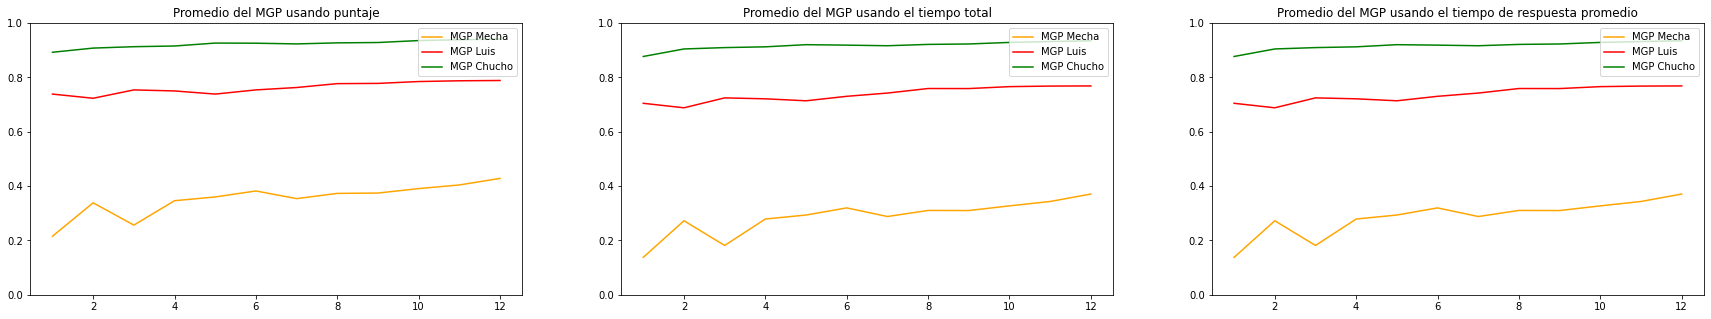

In [52]:
# Creamos las variables para graficar
y_mecha_meanTime = np.zeros(len(y_mecha))
y_mecha_meanResponseTime = np.zeros(len(y_mecha))
y_mecha_meanScore = np.zeros(len(y_mecha))

y_chucho_meanTime = np.zeros(len(y_mecha))
y_chucho_meanResponseTime = np.zeros(len(y_mecha))
y_chucho_meanScore = np.zeros(len(y_mecha))

y_luis_meanTime = np.zeros(len(y_mecha))
y_luis_meanResponseTime = np.zeros(len(y_mecha))
y_luis_meanScore = np.zeros(len(y_mecha))

# Procesamos los datos para cada paciente
for i in range(len(y_mecha)):
    y_mecha_meanTime[i] = sum(y_mecha_totalTime[0:i+1])/(i+1)
    y_mecha_meanResponseTime[i] = sum(y_mecha_responseTime[0:i+1])/(i+1)
    y_mecha_meanScore[i] = sum(y_mecha_score[0:i+1])/(i+1)
    
    y_chucho_meanTime[i] = sum(y_chucho_totalTime[0:i+1])/(i+1)
    y_chucho_meanResponseTime[i] = sum(y_chucho_responseTime[0:i+1])/(i+1)
    y_chucho_meanScore[i] = sum(y_chucho_score[0:i+1])/(i+1)
    
    y_luis_meanTime[i] = sum(y_luis_totalTime[0:i+1])/(i+1)
    y_luis_meanResponseTime[i] = sum(y_luis_responseTime[0:i+1])/(i+1)
    y_luis_meanScore[i] = sum(y_luis_score[0:i+1])/(i+1)
    
# Graficamos los datos
plt.figure(figsize=(30, 5))

scoreGraph = plt.subplot(1, 3, 1)
timeGraph = plt.subplot(1, 3, 2, sharey=scoreGraph)
responseTimeGraph = plt.subplot(1, 3, 3, sharey=scoreGraph)

scoreGraph.plot(x, y_mecha_meanScore, label='MGP Mecha', color="orange")
scoreGraph.plot(x, y_luis_meanScore, label='MGP Luis', color="red")
scoreGraph.plot(x, y_chucho_meanScore, label='MGP Chucho', color="Green")

timeGraph.plot(x, y_mecha_meanTime, label='MGP Mecha', color="orange")
timeGraph.plot(x, y_luis_meanTime, label='MGP Luis', color="red")
timeGraph.plot(x, y_chucho_meanTime, label='MGP Chucho', color="Green")

responseTimeGraph.plot(x, y_mecha_meanResponseTime, label='MGP Mecha', color="orange")
responseTimeGraph.plot(x, y_luis_meanResponseTime, label='MGP Luis', color="red")
responseTimeGraph.plot(x, y_chucho_meanResponseTime, label='MGP Chucho', color="Green")

scoreGraph.legend(loc="upper right")
scoreGraph.set_title("Promedio del MGP usando puntaje")
timeGraph.legend(loc="upper right")
timeGraph.set_title("Promedio del MGP usando el tiempo total")
responseTimeGraph.legend(loc="upper right")
responseTimeGraph.set_title("Promedio del MGP usando el tiempo de respuesta promedio")

plt.ylim(0, 1)
plt.show()

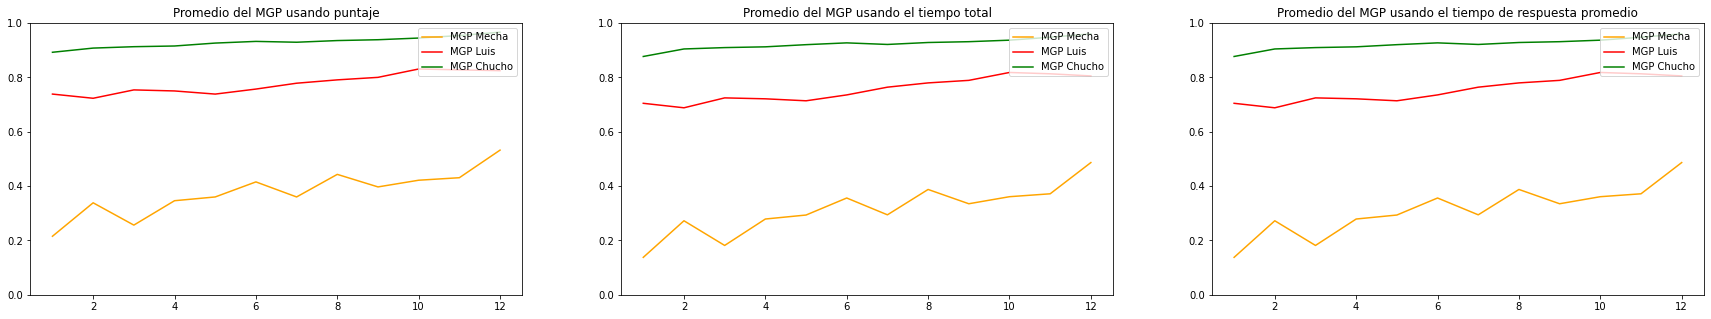

In [62]:
# Creamos las variables para graficar
y_mecha_meanTime = np.zeros(len(y_mecha))
y_mecha_meanResponseTime = np.zeros(len(y_mecha))
y_mecha_meanScore = np.zeros(len(y_mecha))

y_chucho_meanTime = np.zeros(len(y_mecha))
y_chucho_meanResponseTime = np.zeros(len(y_mecha))
y_chucho_meanScore = np.zeros(len(y_mecha))

y_luis_meanTime = np.zeros(len(y_mecha))
y_luis_meanResponseTime = np.zeros(len(y_mecha))
y_luis_meanScore = np.zeros(len(y_mecha))

# Procesamos los datos para cada paciente
n = 5
for i in range(len(y_mecha)):
    if (i<n):
        y_mecha_meanTime[i] = sum(y_mecha_totalTime[0:i+1])/(i+1)
        y_mecha_meanResponseTime[i] = sum(y_mecha_responseTime[0:i+1])/(i+1)
        y_mecha_meanScore[i] = sum(y_mecha_score[0:i+1])/(i+1)

        y_chucho_meanTime[i] = sum(y_chucho_totalTime[0:i+1])/(i+1)
        y_chucho_meanResponseTime[i] = sum(y_chucho_responseTime[0:i+1])/(i+1)
        y_chucho_meanScore[i] = sum(y_chucho_score[0:i+1])/(i+1)

        y_luis_meanTime[i] = sum(y_luis_totalTime[0:i+1])/(i+1)
        y_luis_meanResponseTime[i] = sum(y_luis_responseTime[0:i+1])/(i+1)
        y_luis_meanScore[i] = sum(y_luis_score[0:i+1])/(i+1)
    else:
        y_mecha_meanTime[i] = sum(y_mecha_totalTime[i-n+1:i+1])/n
        y_mecha_meanResponseTime[i] = sum(y_mecha_responseTime[i-n+1:i+1])/n
        y_mecha_meanScore[i] = sum(y_mecha_score[i-n+1:i+1])/n

        y_chucho_meanTime[i] = sum(y_chucho_totalTime[i-n+1:i+1])/n
        y_chucho_meanResponseTime[i] = sum(y_chucho_responseTime[i-n+1:i+1])/n
        y_chucho_meanScore[i] = sum(y_chucho_score[i-n+1:i+1])/n

        y_luis_meanTime[i] = sum(y_luis_totalTime[i-n+1:i+1])/n
        y_luis_meanResponseTime[i] = sum(y_luis_responseTime[i-n+1:i+1])/n
        y_luis_meanScore[i] = sum(y_luis_score[i-n+1:i+1])/n
    
# Graficamos los datos
plt.figure(figsize=(30, 5))

scoreGraph = plt.subplot(1, 3, 1)
timeGraph = plt.subplot(1, 3, 2, sharey=scoreGraph)
responseTimeGraph = plt.subplot(1, 3, 3, sharey=scoreGraph)

scoreGraph.plot(x, y_mecha_meanScore, label='MGP Mecha', color="orange")
scoreGraph.plot(x, y_luis_meanScore, label='MGP Luis', color="red")
scoreGraph.plot(x, y_chucho_meanScore, label='MGP Chucho', color="Green")

timeGraph.plot(x, y_mecha_meanTime, label='MGP Mecha', color="orange")
timeGraph.plot(x, y_luis_meanTime, label='MGP Luis', color="red")
timeGraph.plot(x, y_chucho_meanTime, label='MGP Chucho', color="Green")

responseTimeGraph.plot(x, y_mecha_meanResponseTime, label='MGP Mecha', color="orange")
responseTimeGraph.plot(x, y_luis_meanResponseTime, label='MGP Luis', color="red")
responseTimeGraph.plot(x, y_chucho_meanResponseTime, label='MGP Chucho', color="Green")

scoreGraph.legend(loc="upper right")
scoreGraph.set_title("Promedio del MGP usando puntaje")
timeGraph.legend(loc="upper right")
timeGraph.set_title("Promedio del MGP usando el tiempo total")
responseTimeGraph.legend(loc="upper right")
responseTimeGraph.set_title("Promedio del MGP usando el tiempo de respuesta promedio")

plt.ylim(0, 1)
plt.show()